## Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Load data

In [ ]:
df1 = pd.read_csv('df1.csv', low_memory=False)

In [ ]:
df2 = pd.read_csv('df2.csv', low_memory=False)

In [ ]:
attrition = pd.read_csv('attrition.csv', low_memory=False)

In [ ]:
sample_output = pd.read_csv('sample_output.csv', low_memory=False)

## Exploratory data analysis (EDA)

### Check data types and Look for null or missing values

In [ ]:
df1.head(5)

In [ ]:
df1.info()

In [ ]:
df1.isna().sum()

In [ ]:
df1_cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

In [ ]:
for col in df1_cat_cols:
    print(df1[col].value_counts())
    print('----------------------------------------------------')

In [ ]:
df2.head(5)

In [ ]:
df2.info()

In [ ]:
df2.info()

In [ ]:
df2.isna().sum()

In [ ]:
len(df2)

In [ ]:
col_names = df2.dtypes

In [ ]:
col_names

In [ ]:
df2_cat_cols = col_names[col_names=='object'].index.values

In [ ]:
df2_cat_cols

In [ ]:
for col in df2_cat_cols:
    print(df2[col].value_counts())
    print('----------------------------------------')

### Check each variable range

In [ ]:
df1.describe()

In [ ]:
sns.boxplot(df1['Age'])

In [ ]:
len(df1[df1['Age'] > 60])

In [ ]:
sns.boxplot(df1['DistanceFromHome'])

In [ ]:
filter_age =( df1['Age'] <= 60)

In [ ]:
df1 = df1[filter_age]

In [ ]:
len(df1[df1["DistanceFromHome"] > 40])

In [ ]:
filter_distance = (df1['DistanceFromHome'] <= 40)

In [ ]:
df1 = df1[filter_distance]

In [ ]:
len(df1)

In [ ]:
df2.describe()

In [ ]:
len(df2[df2['YearsAtCompany'] > 40])

In [ ]:
len(df2[df2['YearsInCurrentRole'] > 40])

In [ ]:
len(df2[df2['YearsSinceLastPromotion'] > 40])

In [ ]:
len(df2[df2['YearsWithCurrManager'] > 40])   

In [ ]:
len(df2[df2['TotalWorkingYears'] > 40])       

In [ ]:
filter_gen = (df2['YearsAtCompany'] <= 40)\
            & (df2['YearsInCurrentRole'] <= 40)\
            & (df2['YearsSinceLastPromotion'] <= 40)\
           & (df2['YearsWithCurrManager'] <= 40)\
            & (df2['TotalWorkingYears'] <= 40)

In [ ]:
df2 = df2[filter_gen]

In [ ]:
len(df2)

### Check correlations

In [ ]:
df2['Attrition'].value_counts()

In [ ]:
attrition['Attrition'].value_counts()

In [ ]:
attritiom_filt = attrition[attrition['EmployeeNumber'].isin(df2['EmployeeNumber'])]

In [ ]:
attritiom_filt['Attrition'].value_counts()

In [ ]:
df1.to_csv('df1_new.csv')

In [ ]:
df2.to_csv('df2_new.csv')

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
correlation_calc = df1.corr(method='spearman')
sns.heatmap(correlation_calc, annot=True, cmap='RdBu')

In [ ]:
df1_columns = df1.columns[~(df1.columns.isin(['EmployeeCount', 'JobLevel', 'MonthlyIncome']))]

In [ ]:
df1 = df1[df1_columns]

In [ ]:
df1

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
correlation_calc = df2.corr(method='spearman')
sns.heatmap(correlation_calc, annot=True, cmap='RdBu')

In [ ]:
df2_columns = df2.columns[~(df2.columns.isin(['StandardHours','PerformanceRating',  
                                              'YearsAtCompany', 'YearsInCurrentRole',
                                             'YearsWithCurrManager', 'YearlyIncome', 'Over18']))]

In [ ]:
df2 = df2[df2_columns]

In [ ]:
df2

## Feature engineering

Usually there are some common steps :
    1. Imputation of missing values
    2. Discretization
    3. Categorical encoding
    4. Feature splitting
    5. Handling outliers
    6. Variable Transformation
    7. Scaling
    8. Creating Features
 

### Delete missing values

In [ ]:
len(df2)

3075

In [ ]:
dataset2 = df2

In [ ]:
dataset2 = dataset2[~(dataset2['Attrition'].isna())]

In [ ]:
len(dataset2)

2928

### Categorical encoding

In [ ]:
dataset1 = df1

In [ ]:
dataset1.head(5)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,Laboratory Technician,4.0,Married,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,Manufacturing Director,3.0,Married,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,Research Scientist,2.0,Married,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,Research Scientist,4.0,Single,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,Laboratory Technician,4.0,Divorced,10910.0,1.0


In [ ]:
for col in df1_cat_cols:
    print(dataset1[col].value_counts())
    print('------------------------------------------')

Travel_Rarely        2769
Travel_Frequently     705
Non-Travel            398
Name: BusinessTravel, dtype: int64
------------------------------------------
Research & Development    2517
Sales                     1196
Human Resources            159
Name: Department, dtype: int64
------------------------------------------
Life Sciences       1586
Medical             1221
Marketing            433
Technical Degree     347
Other                218
Human Resources       67
Name: EducationField, dtype: int64
------------------------------------------
Male      2341
Female    1531
Name: Gender, dtype: int64
------------------------------------------
Sales Executive              880
Research Scientist           795
Laboratory Technician        666
Manufacturing Director       375
Healthcare Representative    341
Manager                      261
Sales Representative         212
Research Director            208
Human Resources              134
Name: JobRole, dtype: int64
------------------------

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_enc = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])

In [ ]:
dataset1['BusinessTravel'] = ordinal_enc.fit_transform(dataset1.loc[:, ['BusinessTravel']])

In [ ]:
dataset1['BusinessTravel'].value_counts()

1.0    2769
2.0     705
0.0     398
Name: BusinessTravel, dtype: int64

In [ ]:
dataset1['Department'].value_counts()

Research & Development    2517
Sales                     1196
Human Resources            159
Name: Department, dtype: int64

In [ ]:
dataset1['Department_RD'] = 0
dataset1['Department_sales'] = 0
dataset1['Department_HR'] = 0

In [ ]:
dataset1.loc[dataset1['Department'] == 'Research & Development', 'Department_RD'] = 1
dataset1.loc[dataset1['Department'] == 'Sales', 'Department_sales'] = 1
dataset1.loc[dataset1['Department'] == 'Human Resources', 'Department_HR'] = 1

In [ ]:
dataset1.head(5)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Department_RD,Department_sales,Department_HR
0,104,30.0,1.0,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,Laboratory Technician,4.0,Married,15998.0,1.0,1,0,0
1,1638,38.0,1.0,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,Manufacturing Director,3.0,Married,14199.0,3.0,1,0,0
2,164,26.0,1.0,841.0,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,Research Scientist,2.0,Married,23300.0,1.0,1,0,0
3,395,28.0,1.0,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,Research Scientist,4.0,Single,4488.0,1.0,1,0,0
4,53,35.0,1.0,464.0,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,Laboratory Technician,4.0,Divorced,10910.0,1.0,1,0,0


In [ ]:
bool_dict={'Male':0, 'Female':1}

In [ ]:
dataset1['Gender'] = dataset1['Gender'].map(bool_dict)

In [ ]:
dataset1 = pd.get_dummies(data=dataset1, columns=['EducationField', 'JobRole', 'MaritalStatus'])

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
dataset1.head(5)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,Department_RD,Department_sales,Department_HR,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,104,30.0,1.0,852.0,Research & Development,1.0,1.0,4.0,0,55.0,2.0,4.0,15998.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1638,38.0,1.0,397.0,Research & Development,2.0,2.0,4.0,1,54.0,2.0,3.0,14199.0,3.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,164,26.0,1.0,841.0,Research & Development,6.0,3.0,3.0,1,46.0,2.0,2.0,23300.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,395,28.0,1.0,1117.0,Research & Development,8.0,2.0,4.0,1,66.0,3.0,4.0,4488.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,53,35.0,1.0,464.0,Research & Development,4.0,2.0,3.0,0,75.0,3.0,4.0,10910.0,1.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
dataset1 = dataset1.drop(columns=['Department'])

In [ ]:
df2_cat_cols

array(['Over18', 'OverTime', 'Attrition'], dtype=object)

In [ ]:
for col in ['OverTime', 'Attrition']:
    print(dataset2[col].value_counts())
    print('-------------------------------------')

No     2145
Yes     783
Name: OverTime, dtype: int64
-------------------------------------
No     1636
Yes    1292
Name: Attrition, dtype: int64
-------------------------------------


In [ ]:
bool_dict2 = {'Yes': 1, 'No': 0}

In [ ]:
dataset2['OverTime'] = dataset2['OverTime'].map(bool_dict2)

In [ ]:
dataset2['Attrition'] = dataset2['Attrition'].map(bool_dict2)

In [ ]:
dataset2.head(5)

,EmployeeNumber,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,Attrition
0,104,1,12.0,3.0,2.0,10.0,1.0,2.0,3.0,0
1,1638,1,19.0,4.0,1.0,10.0,6.0,4.0,0.0,0
2,164,0,19.0,3.0,0.0,5.0,3.0,2.0,4.0,0
3,395,0,21.0,4.0,0.0,5.0,3.0,3.0,0.0,0
4,53,0,12.0,3.0,1.0,1.0,3.0,3.0,0.0,0


### Create final dataset

In [ ]:
dataset = dataset1.merge(dataset2, on='EmployeeNumber')

In [ ]:
dataset

,EmployeeNumber,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,Department_RD,Department_sales,Department_HR,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,Attrition
0,104,30.0,1.0,852.0,1.0,1.0,4.0,0,55.0,2.0,4.0,15998.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,12.0,3.0,2.0,10.0,1.0,2.0,3.0,0
1,1638,38.0,1.0,397.0,2.0,2.0,4.0,1,54.0,2.0,3.0,14199.0,3.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,19.0,4.0,1.0,10.0,6.0,4.0,0.0,0
2,164,26.0,1.0,841.0,6.0,3.0,3.0,1,46.0,2.0,2.0,23300.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,19.0,3.0,0.0,5.0,3.0,2.0,4.0,0
3,395,28.0,1.0,1117.0,8.0,2.0,4.0,1,66.0,3.0,4.0,4488.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,21.0,4.0,0.0,5.0,3.0,3.0,0.0,0
4,53,35.0,1.0,464.0,4.0,2.0,3.0,0,75.0,3.0,4.0,10910.0,1.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,12.0,3.0,1.0,1.0,3.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,7956,29.0,1.0,1210.0,2.0,3.0,1.0,0,78.0,2.0,2.0,3687.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,19.0,2.0,2.0,10.0,2.0,3.0,0.0,1
2347,7957,29.0,1.0,1210.0,2.0,3.0,1.0,0,78.0,2.0,2.0,3687.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,19.0,2.0,2.0,10.0,2.0,3.0,0.0,1
2348,7958,29.0,1.0,1210.0,2.0,3.0,1.0,0,78.0,2.0,2.0,3687.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,19.0,2.0,2.0,10.0,2.0,3.0,0.0,1
2349,7962,55.0,1.0,725.0,2.0,3.0,4.0,0,78.0,3.0,1.0,21199.0,5.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,13.0,4.0,1.0,24.0,2.0,3.0,1.0,1


<AxesSubplot:>

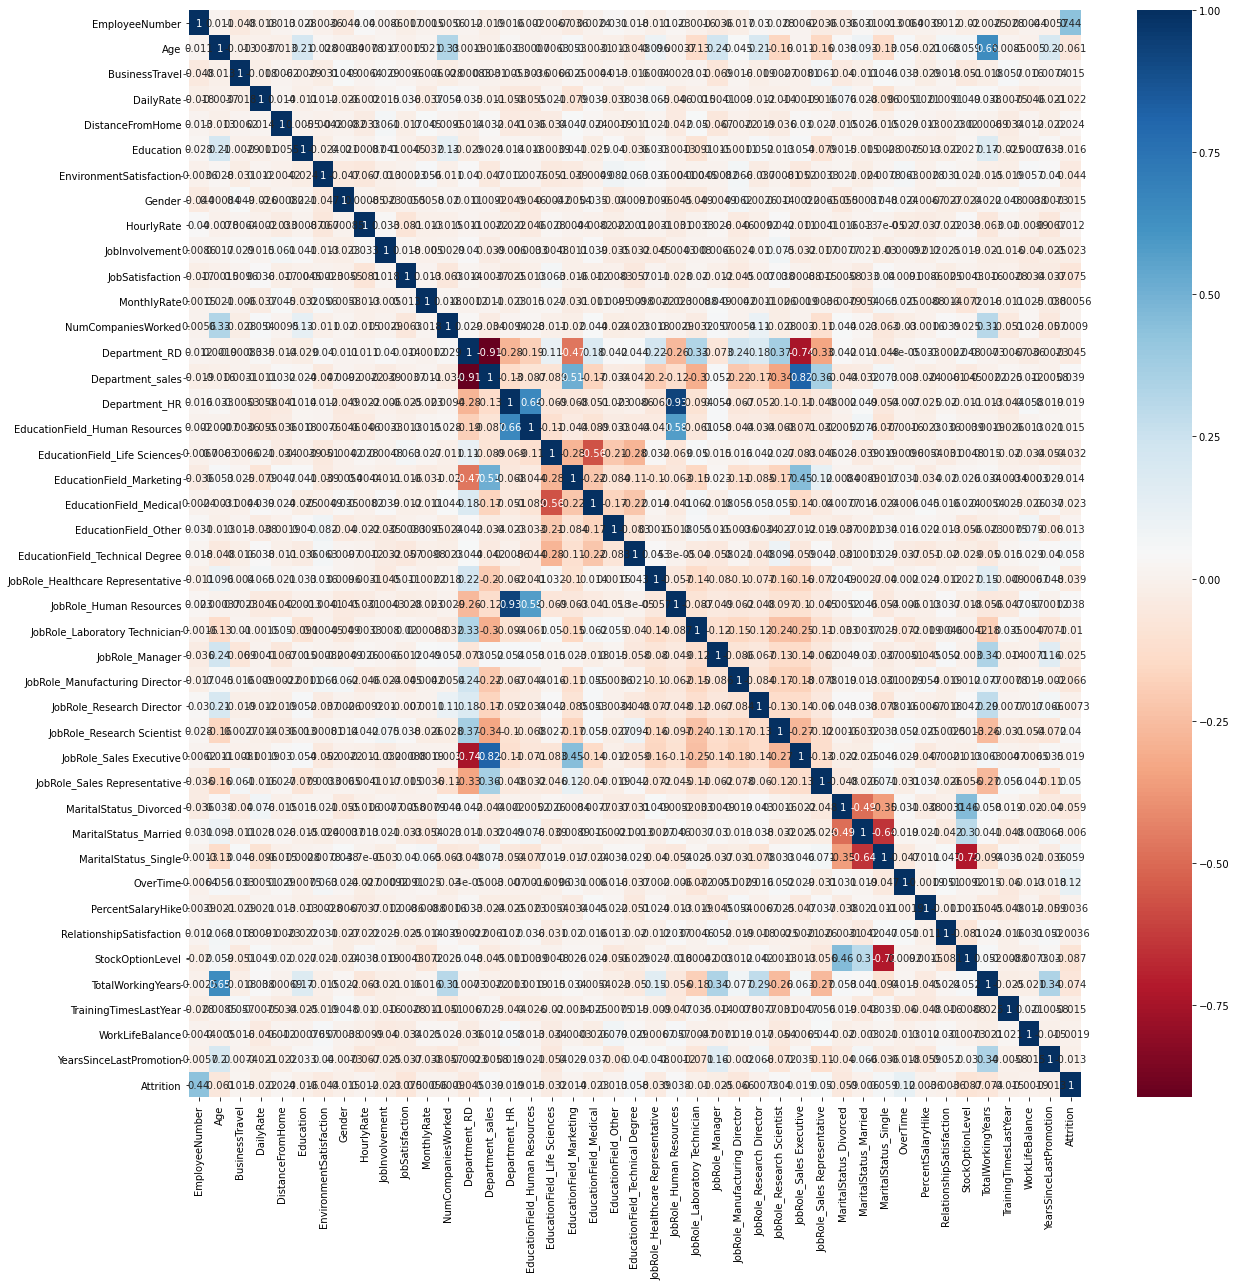

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
correlation_calc = dataset.corr(method='spearman')
sns.heatmap(correlation_calc, annot=True, cmap='RdBu')

In [ ]:
dataset = dataset.drop(columns=['TotalWorkingYears'])

In [ ]:
len(dataset)

2351

In [ ]:
dataset.to_csv('dataset.csv')

## Modelling

### Create train test data

In [ ]:
#y_rand = pd.DataFrame(np.random.randint(0, 2, dataset.shape[0]))

In [ ]:
#y_rand.value_counts()

In [ ]:
rule2 = (dataset['HourlyRate'] < dataset['HourlyRate'].mean() + 15 )\
        & (dataset['YearsSinceLastPromotion'] > dataset['YearsSinceLastPromotion'].mean() - 3)\
        & (dataset['WorkLifeBalance'] > 2)

In [ ]:
dataset['AttritionRule2'] = rule2

In [ ]:
dataset['AttritionRule2'].value_counts()

True     1235
False    1116
Name: AttritionRule2, dtype: int64

In [ ]:
dataset['Attrition'].value_counts()

0    1447
1     904
Name: Attrition, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# features
X = dataset.drop(columns=['Attrition', 'AttritionRule2', 'EmployeeNumber'], axis=1)

In [ ]:
# target
y = dataset['AttritionRule2']

In [ ]:
y_rand = np.random.randint(0,2, y.shape[0])

In [ ]:
y_rand.shape

(2351,)

In [ ]:
X.shape, y.shape

((2351, 40), (2351,))

In [ ]:
X_columns = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X_columns)

In [ ]:
X.describe()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,Department_RD,Department_sales,Department_HR,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.451601,0.532752,0.499464,0.294768,0.478839,0.571104,0.386644,0.521480,0.583865,0.573373,0.489665,0.297037,0.660995,0.299447,0.039558,0.017439,0.415142,0.099957,0.309655,0.059124,0.098681,0.084645,0.034453,0.175245,0.064228,0.097831,0.060825,0.208422,0.221182,0.053169,0.210974,0.471714,0.317312,0.273501,0.296166,0.586559,0.256628,0.460939,0.592372,0.143287
std,0.216876,0.261321,0.287221,0.290624,0.256623,0.361163,0.487085,0.287451,0.233681,0.364230,0.283187,0.278624,0.473472,0.458113,0.194959,0.130930,0.492851,0.300007,0.462450,0.235906,0.298297,0.278412,0.182430,0.380257,0.245211,0.297149,0.239060,0.406266,0.415131,0.224418,0.408087,0.499305,0.465529,0.445850,0.255609,0.359091,0.276290,0.218902,0.235924,0.214177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.500000,0.257521,0.035714,0.250000,0.333333,0.000000,0.271429,0.333333,0.333333,0.244850,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.333333,0.000000,0.333333,0.333333,0.000000
50%,0.428571,0.500000,0.501433,0.214286,0.500000,0.666667,0.000000,0.528571,0.666667,0.666667,0.486047,0.222222,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214286,0.666667,0.333333,0.500000,0.666667,0.066667
75%,0.595238,0.500000,0.753223,0.464286,0.750000,1.000000,1.000000,0.771429,0.666667,1.000000,0.733066,0.444444,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.333333,0.500000,0.666667,0.133333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 123)

In [ ]:
X_train.shape, X_test.shape, y_train.shape,  y_test.shape

((1763, 40), (588, 40), (1763,), (588,))

In [ ]:
X.columns.sort_values()

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department_HR', 'Department_RD',
       'Department_sales', 'DistanceFromHome', 'Education',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance'

### Create classification models

#### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_regression = LogisticRegression()

In [ ]:
log_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = log_regression.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_lr)

0.8775510204081632

#### 2. Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth=50, random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=123)

In [ ]:
y_pred_rf = random_forest.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf)

1.0

In [ ]:
feature_scores = pd.Series(random_forest.feature_importances_, index = X_train.columns).sort_values(ascending=False)

In [ ]:
feature_scores.head(10)

HourlyRate                 0.375025
WorkLifeBalance            0.366384
MonthlyRate                0.027506
DailyRate                  0.025885
Age                        0.019898
DistanceFromHome           0.018406
PercentSalaryHike          0.015692
YearsSinceLastPromotion    0.013482
NumCompaniesWorked         0.011824
TrainingTimesLastYear      0.011814
dtype: float64

In [ ]:
X.shape

(2351, 40)

#### 3. kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')

In [ ]:
knn.fit(X_train[relevant_cols], y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred_knn = knn.predict(X_test[relevant_cols])

In [ ]:
accuracy_score(y_test, y_pred_knn)

0.9251700680272109

#### 4. SVM

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel='rbf', C=1)

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1)

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_svc)

0.9183673469387755

#### 5. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_gnb = gnb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_gnb)

0.8503401360544217

## Performance Metrics

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
models = [log_regression, random_forest, knn, svc, gnb]

In [ ]:
predictions = [y_pred_lr, y_pred_rf, y_pred_knn, y_pred_svc, y_pred_gnb]

In [ ]:
for model, pred in zip(models, predictions):
    print(f'Model : {model}')
    print(f'{classification_report(y_test, pred)}')
    print('--------------------------------------------------------------')

Model : LogisticRegression()
              precision    recall  f1-score   support

       False       0.86      0.89      0.87       279
        True       0.90      0.86      0.88       309

    accuracy                           0.88       588
   macro avg       0.88      0.88      0.88       588
weighted avg       0.88      0.88      0.88       588

--------------------------------------------------------------
Model : RandomForestClassifier(max_depth=50, random_state=123)
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       279
        True       1.00      1.00      1.00       309

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588

--------------------------------------------------------------
Model : KNeighborsClassifier(metric='euclidean')
              precision    recall  f1-score   support

       False       0.92 

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_lr = {'C':[0, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']}
param_grid_rf = {'n_estimators': [5, 20, 30, 40, 50], 'min_samples_leaf': [2, 4, 6, 8],
                'max_features': ['sqrt', 'log2', None], 'max_depth': [20, 50, 80, 100, 120,200]}
param_grid_knn = {'n_neighbors':[3, 5, 10, 20], 'metric': ['euclidean', 'minkowski']}
param_grid_svc = {'kernel': ['poly', 'linear', 'rbf'], 'C': [0.1, 1, 10]}

params = [param_grid_lr, param_grid_rf, param_grid_knn, param_grid_svc]

In [ ]:
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), svm.SVC()]

In [ ]:
results = []
for param, model in zip(params, models):
    best_model = GridSearchCV(model, param)
    best_model.fit(X_train, y_train)
    results.append(best_model)

In [ ]:
for result in results:
    best_estimator = result.best_estimator_
    best_params = result.best_params_
    best_score = result.best_score_
    print(best_estimator)
    print('---------------------------------------------')
    
    y_pred = best_estimator.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
    print('------------------------------------------------------------------------------')

LogisticRegression(C=5)
---------------------------------------------
Accuracy : 0.8809523809523809
------------------------------------------------------------------------------
RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=20)
---------------------------------------------
Accuracy : 1.0
------------------------------------------------------------------------------
KNeighborsClassifier(metric='euclidean', n_neighbors=3)
---------------------------------------------
Accuracy : 0.7840136054421769
------------------------------------------------------------------------------
SVC(C=10)
---------------------------------------------
Accuracy : 0.9438775510204082
------------------------------------------------------------------------------
